In [5]:
using DataFrames
using Printf
using CSV
using Dates
using DayCounts
# using Revise
using FileIO
using VegaLite, VegaDatasets

main_path = "/home/artur/BondPricing/bond-data"
module_path = string(main_path, "/module")
script_path = string(main_path, "/data-scripts/plots")
include(string(joinpath(module_path, "data_module"), ".jl"))
include(string(joinpath(module_path, "stats_module"), ".jl"))
include(string(joinpath(module_path, "plot_module"), ".jl"))
ENV["LINES"] = 100
ENV["COLUMNS"] = 1000

1000

In [6]:
dto = DataMod.data_obj_constructor()

Main.DataMod.data_obj("/home/artur/BondPricing/bond-data", "data", "MERGED", "Stats", "merged", Main.DataMod.trace_obj("TRACE", "/home/artur/BondPricing/bond-data/data/TRACE", "raw", "pre-processed", "processed", "filtered", "trace_enhanced", "cancel_trd", "reverse_trd", "original_trd", "processed", "filtered", ["cusip_id", "entrd_vol_qt", "rptd_pr", "trd_exctn_dt", "trd_exctn_tm", "trc_st", "rpt_side_cd", "cntra_mp_id", "msg_seq_nb"], ["cusip_id", "entrd_vol_qt", "rptd_pr", "trd_exctn_dt", "trd_exctn_tm", "trc_st", "rpt_side_cd", "cntra_mp_id", "orig_msg_seq_nb"], Dict{String,DataType}("yld_sign_cd" => String,"first_trade_ctrl_num" => Int64,"sale_cndtn2_cd" => String,"yld_pt" => Float64,"asof_cd" => String,"sell_cmsn_rt" => Float64,"trd_exctn_tm" => String,"sale_cndtn_cd" => String,"days_to_sttl_ct" => String,"rptd_pr" => Float64…)), Main.DataMod.mergent_obj("MERGENT", "/home/artur/BondPricing/bond-data/data/MERGENT", "mergent_fisd", "filtered", Dict(:COUPON_INFO => [:ISSUE_ID, :DATED

In [43]:
yr = 2019
qtr = 1

include(string(joinpath(module_path, "stats_module"), ".jl"))
snc = StatsMod.load_stats_data(dto, yr, qtr; stats_by_num_cov=true)
scc = StatsMod.load_stats_data(dto, yr, qtr; stats_by_num_cov=false)

first(scc, 5)

 
Filename: 2019Q1_stats_by_num_cov.csv
 
Reading dataframe in folder: /home/artur/BondPricing/bond-data/data/Stats/2019...
 
Filename: 2019Q1_stats_by_cov_cat.csv
 
Reading dataframe in folder: /home/artur/BondPricing/bond-data/data/Stats/2019...


,trd_exctn_yr,trd_exctn_qtr,otc,hy,ig,ats,cov,ncov,total_trd_count,total_bonds,total_issuers,qt25_trd_vol,mean_trd_vol,median_trd_vol,qt75_trd_vol,total_trd_vol_tr,cg1_mean_trd_vol,cg2_mean_trd_vol,cg3_mean_trd_vol,cg4_mean_trd_vol,cg5_mean_trd_vol,cg6_mean_trd_vol,cg7_mean_trd_vol,cg8_mean_trd_vol,cg9_mean_trd_vol,cg10_mean_trd_vol,cg11_mean_trd_vol,cg12_mean_trd_vol,cg13_mean_trd_vol,cg14_mean_trd_vol,cg15_mean_trd_vol,cg1_median_trd_vol,cg2_median_trd_vol,cg3_median_trd_vol,cg4_median_trd_vol,cg5_median_trd_vol,cg6_median_trd_vol,cg7_median_trd_vol,cg8_median_trd_vol,cg9_median_trd_vol,cg10_median_trd_vol,cg11_median_trd_vol,cg12_median_trd_vol,cg13_median_trd_vol,cg14_median_trd_vol,cg15_median_trd_vol,cg1_trd_vol_tr,cg2_trd_vol_tr,cg3_trd_vol_tr,cg4_trd_vol_tr,cg5_trd_vol_tr,cg6_trd_vol_tr,cg7_trd_vol_tr,cg8_trd_vol_tr,cg9_trd_vol_tr,cg10_trd_vol_tr,cg11_trd_vol_tr,cg12_trd_vol_tr,cg13_trd_vol_tr,cg14_trd_vol_tr
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2019,1,0,0,0,0,0,0,2981038,8739,2030,10000.0,466783.0,25000.0,143000.0,1391.5,31309.6,3.49623e5,1932.9,8684.28,287.968,2.92832e5,4.51578e5,182971.0,19850.1,5185.72,380028.0,1.91872e5,3.52769e5,36098.4,3.49717e5,0.0,16000.0,0.0,0.0,0.0,9000.0,25000.0,0.0,0.0,0.0,20000.0,0.0,15000.0,0.0,15000.0,93.335,1042.24,5.76206,25.8882,0.858444,872.943,1346.17,545.444,59.1739,15.4588,1132.88,571.977,1051.62,107.611
2,2019,1,0,0,0,0,0,1,115298,463,220,10000.0,3.93122e5,25000.0,100000.0,45.3261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019,1,0,0,0,0,1,0,2865740,8276,1954,10000.0,4.69747e5,25000.0,145000.0,1346.17,32569.2,3.63689e5,2010.67,9033.67,299.554,3.04613e5,4.69747e5,1.90333e5,20648.7,5394.36,3.95318e5,1.99591e5,3.66962e5,37550.7,3.63787e5,0.0,20000.0,0.0,0.0,0.0,10000.0,25000.0,0.0,0.0,0.0,20000.0,0.0,17000.0,0.0,15000.0,93.335,1042.24,5.76206,25.8882,0.858444,872.943,1346.17,545.444,59.1739,15.4588,1132.88,571.977,1051.62,107.611
4,2019,1,0,1,0,0,0,0,764711,1968,892,10000.0,4.86845e5,30000.0,200000.0,372.296,99301.0,3.4148e5,1732.13,4089.43,1036.08,3.72252e5,4.834e5,1.95702e5,69259.1,8732.28,4.4349e5,2.99642e5,4.19028e5,1.22905e5,4.17914e5,0.0,16000.0,0.0,0.0,0.0,15000.0,28000.0,0.0,0.0,0.0,25000.0,10000.0,23000.0,0.0,22000.0,75.9366,261.134,1.32458,3.12723,0.792303,284.665,369.661,149.655,52.9632,6.67767,339.142,229.139,320.435,93.9867
5,2019,1,0,1,0,0,0,1,5227,62,35,15000.0,5.0395e5,81000.0,275000.0,2.63415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
scripts_path = string(main_path, "/data-scripts/plots")
include(string(joinpath(scripts_path, "plot_cov_cat"), ".jl"))
pl

 
Filename: 2019Q1_stats_by_cov_cat.csv
 
Reading dataframe in folder: /home/artur/BondPricing/bond-data/data/Stats/2019...


12-element Array{Any,1}:
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec

In [45]:
include(string(joinpath(scripts_path, "plot_num_covs"), ".jl"))
pl

 
Filename: 2019Q1_stats_by_num_cov.csv
 
Reading dataframe in folder: /home/artur/BondPricing/bond-data/data/Stats/2019...


24-element Array{Any,1}:
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec

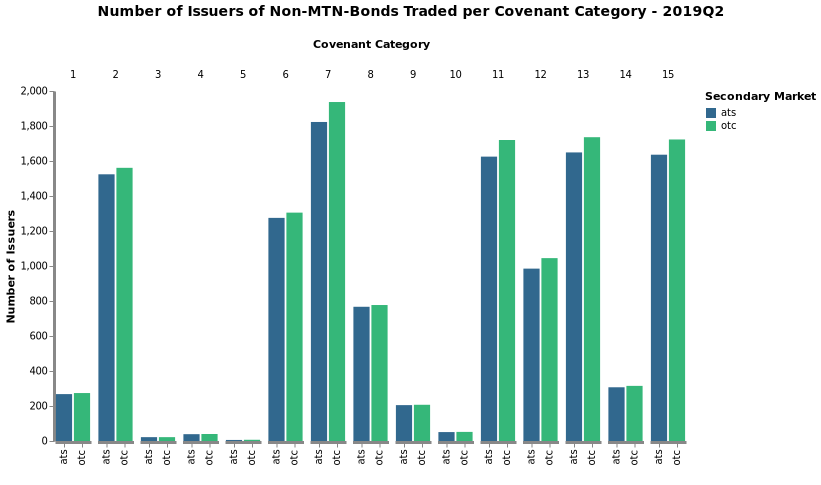

In [10]:
scripts_path = string(main_path, "/data-scripts/plots")
plt_dir = "plots"

color_scale="viridis"
cal_formula=""
cal_var=""
col_var="cov_cat"
col_var_type="ordinal"
col_title="Covenant Category"
col_sort="ascending"
x_var="sbm:n"
x_var_type="nominal"
x_axis_title=" "
width_step=18
legend_title="Secondary Market"
spacing=4.5
height=350
save_plt= false
plt_type = "cov_cat"
file_ext="png"
# }}}
pl = [ ]

# Issuers per Covenant Category {{{1
stats_var=:issuers
tt = PlotMod.prepare_cat_plot(scc; stat=stats_var)

## Issuer Count
y_var="value"
y_axis_title="Number of Issuers"
title=[string("Number of Issuers of Non-MTN-Bonds Traded per Covenant Category")]
if :period in Symbol.(names(tt))
    title[end] = string(title[end], " - ", tt[1, :period])
end

include(string(scripts_path, "/", "single_vega_plt_script.jl"))

In [24]:
df

,period,sbm,rt,sum_num_cov,variable,value,perc_sbm_total,perc_sbm_rt_total
,Symbol,Symbol,Symbol,Int64,Cat…,Int64,Float64,Float64
1,2019Q2,any,any,0,trades_by_num_cov,94837,3.43503,3.43503
2,2019Q2,any,any,1,trades_by_num_cov,2160,0.078236,0.078236
3,2019Q2,any,any,2,trades_by_num_cov,120755,4.37379,4.37379
4,2019Q2,any,any,3,trades_by_num_cov,211699,7.66781,7.66781
5,2019Q2,any,any,4,trades_by_num_cov,191240,6.92678,6.92678
6,2019Q2,any,any,5,trades_by_num_cov,451238,16.344,16.344
7,2019Q2,any,any,6,trades_by_num_cov,475062,17.2069,17.2069
8,2019Q2,any,any,7,trades_by_num_cov,530891,19.2291,19.2291
9,2019Q2,any,any,8,trades_by_num_cov,484147,17.536,17.536


In [22]:
stats_var=:count
df = PlotMod.prepare_num_cov_plot(snc; stat=stats_var)

# Trade Count {{{2
color_scale="viridis"

cond = .&(df[:, :sbm] .!= :any, df[:, :rt] .== :any)
tt = df[cond, :]

x_var="sbm:n"
x_var_type="nominal"
legend_title="Secondary Market"

y_var="value"
y_axis_title="Trade Count"
title=["Number of Trades of Non-MTN-Bonds Traded",
        " by Number of Covenant Categories per Bond"]
if :period in Symbol.(names(tt))
    title[end] = string(title[end], " - ", tt[1, :period])
end

include(string(scripts_path, "/", "single_vega_plt_script.jl"))
push!(pl, p)

13-element Array{Any,1}:
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec

In [5]:
# Common Parameters {{{1
col_var="sum_num_cov"
col_var_type="ordinal"
col_title="Number of Covenant Categories per Bond"
col_sort="ascending"
x_var="sbm:n"
x_var_type="nominal"
x_axis_title=" "
width_step=18
legend_title="Secondary Market"
spacing=1
height=250
save_plt=true
plt_type = "num_cov"
file_ext="png"
#
save_plt=false
scripts_path = string(main_path, "/data-scripts")
plt_dir = "plots"

"plots"

In [37]:
include(string(joinpath(scripts_path, "plot_cov_cat"), ".jl"))
pl

 
Filename: 2019Q3_stats_by_cov_cat.csv
 
Reading dataframe in folder: /home/artur/BondPricing/bond-data/data/Stats/2019...


12-element Array{Any,1}:
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec

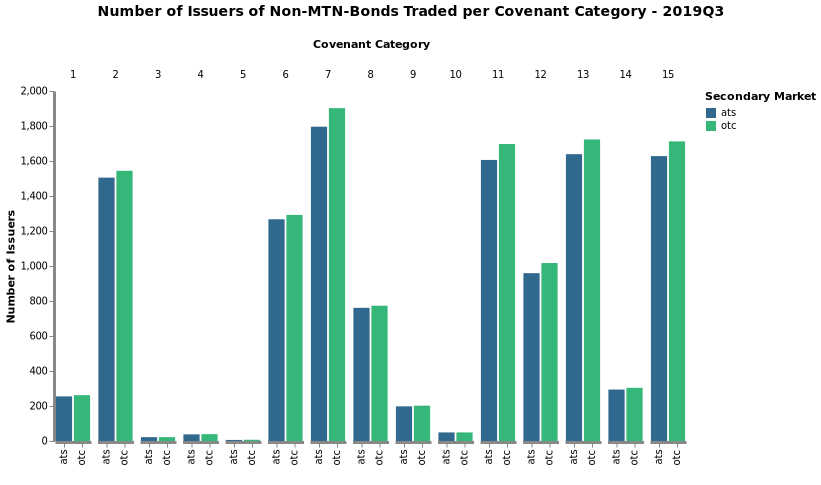

In [15]:
pl[1]

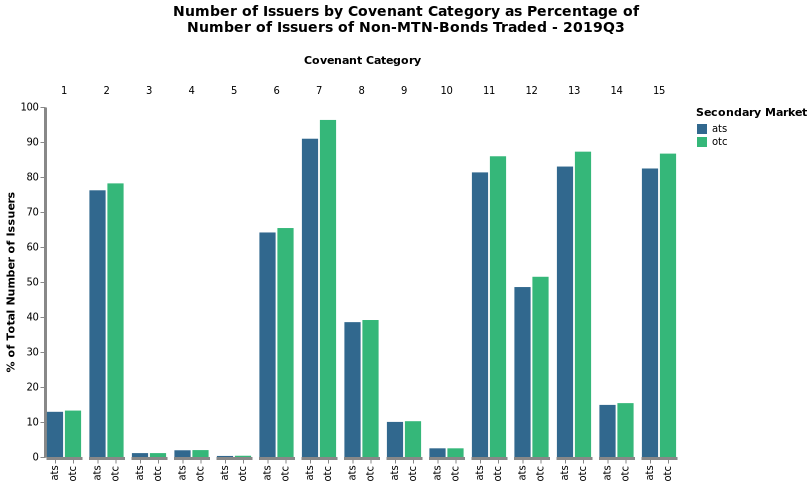

In [16]:
pl[2]

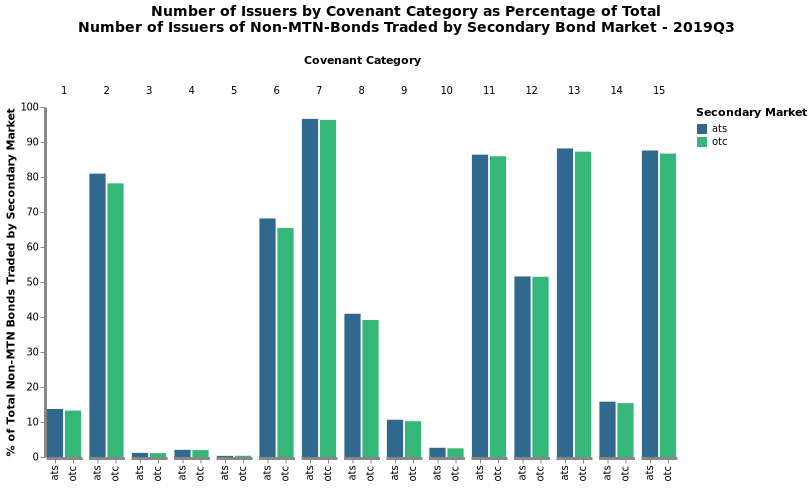

In [17]:
pl[3]

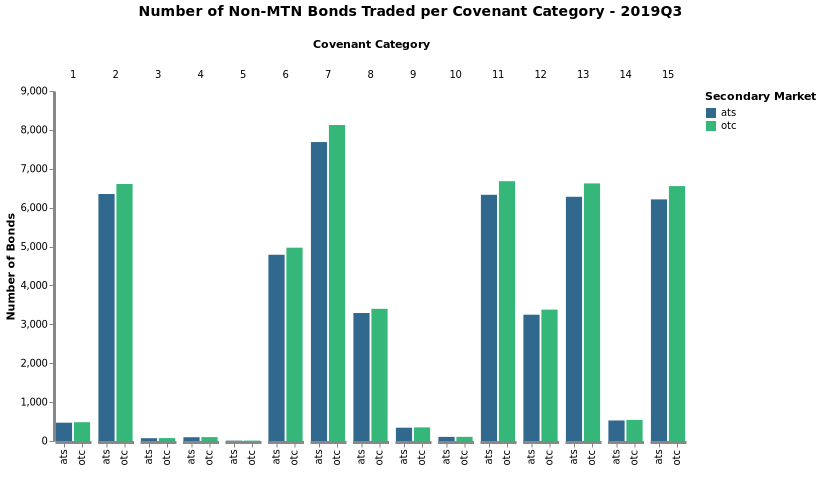

In [18]:
pl[4]

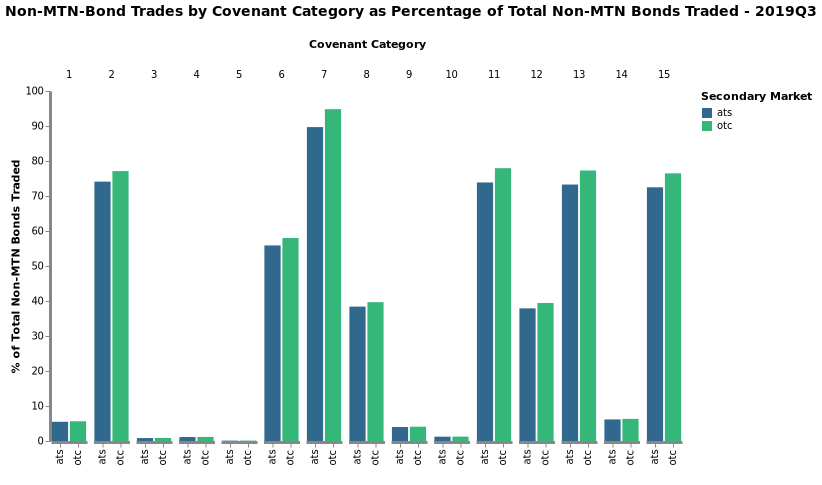

In [19]:
pl[5]

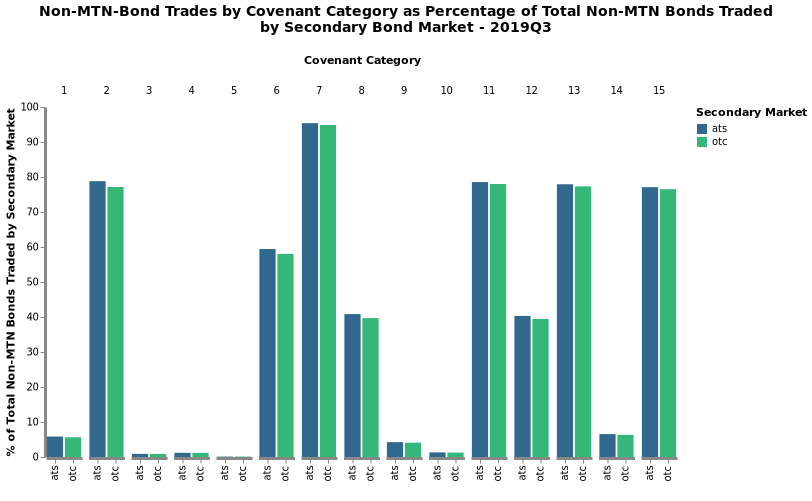

In [20]:
pl[6]

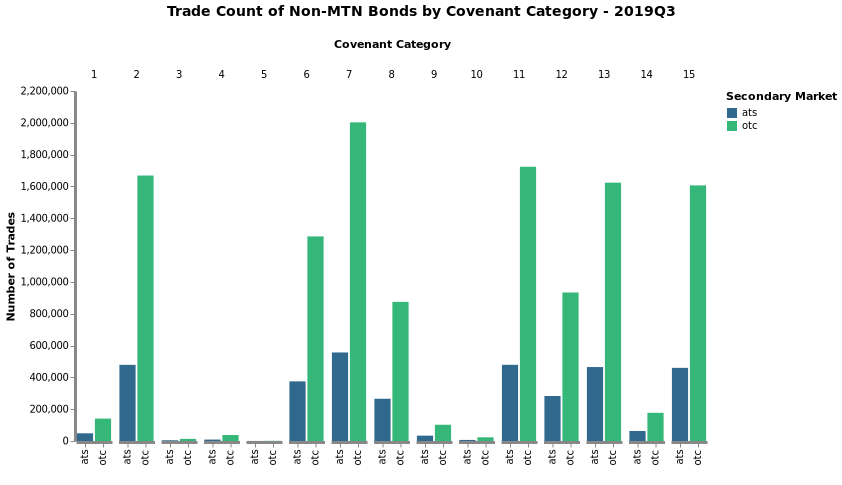

In [21]:
pl[7]

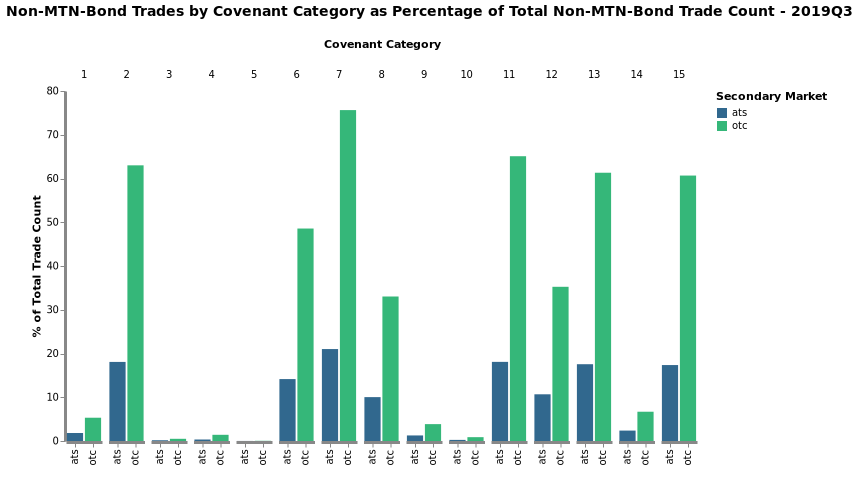

In [22]:
pl[8]

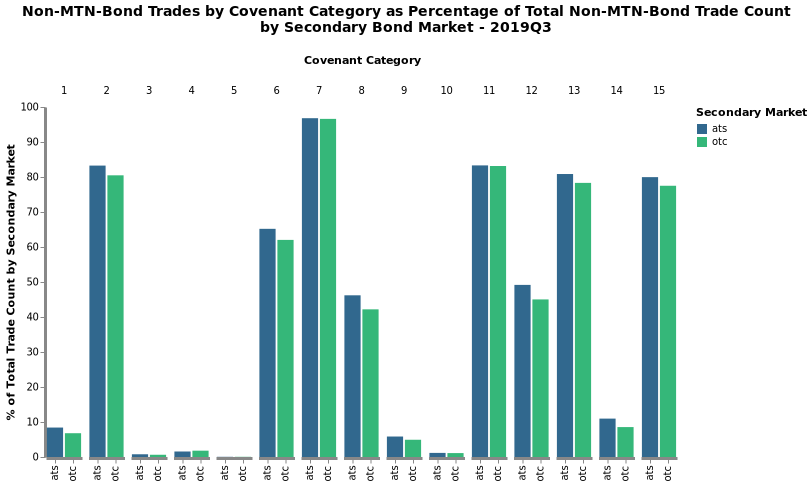

In [23]:
pl[9]

In [32]:
snc

,trd_exctn_yr,trd_exctn_qtr,sbm,rt,median_num_cov,mean_num_cov,sum_num_cov,mean_vol_by_num_cov,median_vol_by_num_cov,total_vol_by_num_cov,trades_by_num_cov,bonds_by_num_cov,issuers_by_num_cov,period
,Int64,Int64,Symbol,Symbol,Float64,Float64,Int64,Float64,Float64,Float64,Int64,Int64,Int64,Symbol
1,2019,3,any,any,6.0,5.94466,0,3.5684e5,25000.0,31.6699,88751,440,215,2019Q3
2,2019,3,any,any,6.0,5.94466,1,3.55698e5,35000.0,0.711397,2000,20,14,2019Q3
3,2019,3,any,any,6.0,5.94466,2,5.40175e5,35000.0,62.6841,116044,405,179,2019Q3
4,2019,3,any,any,6.0,5.94466,3,5.16156e5,36000.0,99.5423,192853,589,273,2019Q3
5,2019,3,any,any,6.0,5.94466,4,4.3314e5,25000.0,80.9257,186835,767,336,2019Q3
6,2019,3,any,any,6.0,5.94466,5,4.54036e5,29000.0,188.062,414200,1538,555,2019Q3
7,2019,3,any,any,6.0,5.94466,6,4.02046e5,25000.0,181.337,451037,1520,536,2019Q3
8,2019,3,any,any,6.0,5.94466,7,3.61491e5,25000.0,191.261,529089,1593,532,2019Q3
9,2019,3,any,any,6.0,5.94466,8,3.5196e5,25000.0,161.962,460173,1212,423,2019Q3


In [34]:
scripts_path = string(main_path, "/data-scripts/plots")
include(string(joinpath(scripts_path, "plot_num_covs"), ".jl"))
pl

 
Filename: 2019Q3_stats_by_num_cov.csv
 
Reading dataframe in folder: /home/artur/BondPricing/bond-data/data/Stats/2019...


24-element Array{Any,1}:
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec
 VegaLite.VLSpec

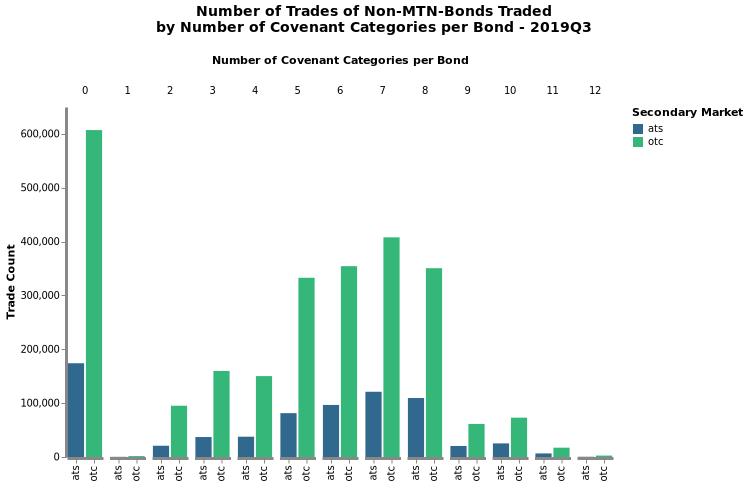

In [35]:
pl[7]

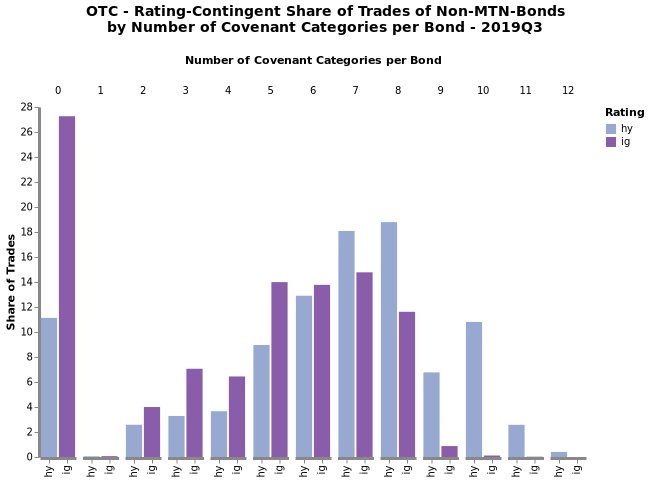

In [36]:
pl[10]

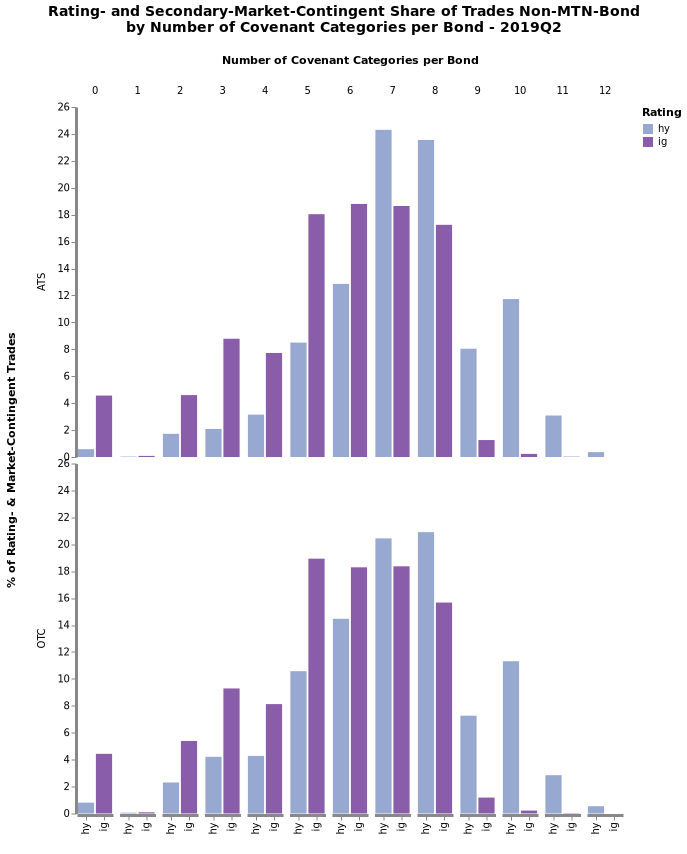

In [45]:
pl[11]

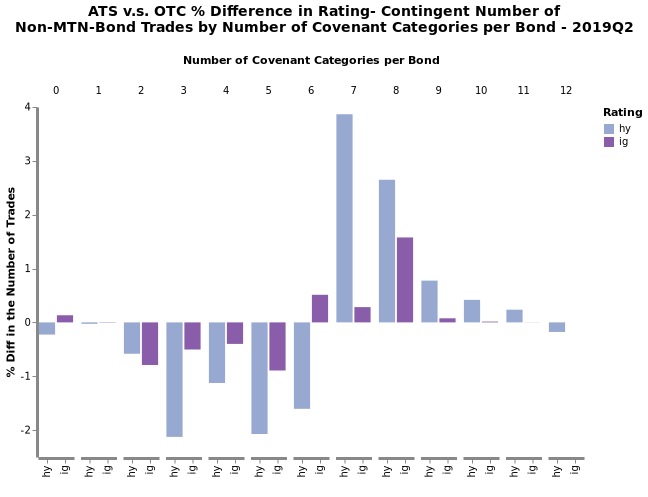

In [46]:
pl[12]